In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import requests
from pathlib import Path
import json
import os
from api_keys import weather_api_key
from datetime import datetime

#  create the bike sharing data for  2021 & 2022
csv_path2021 = "C:/Users/georg/DataProjects/Clean Data/all_2021_data.csv"
csv_path2022 = "C:/Users/georg/DataProjects/Clean Data/all_2022_data.csv"

# Read the CSV files for each year
df_2021 = pd.read_csv(csv_path2021,low_memory=False)
df_2022 = pd.read_csv(csv_path2022,low_memory=False)

# Concatenate the dataframes
bike_sharing = pd.concat([df_2021, df_2022], ignore_index=True)


# Print the first few rows of the combined DataFrame
bike_sharing.head()




,Ride ID,Bike Type,Start Date,End Date,Start Station,Start Station ID,End Station,End Station ID,Starting Lat,Starting Lng,Ending Lat,Ending Lng,Member type,Day of Week,Year,Day Type,Month,Duration,Start Time,End Time
0,EF1237396C1D2DF4,electric_bike,2021-11-15,2021-11-15,Rhode Island & Connecticut Ave NW,31239.0,Potomac & M St NW,31295.0,38.905874,-77.039957,38.905309,-77.065044,member,Monday,2021,Weekday,Nov,460,09:40 AM,09:48 AM
1,4CA89455176FD912,classic_bike,2021-11-23,2021-11-23,Rhode Island & Connecticut Ave NW,31239.0,18th & R St NW,31278.0,38.905996,-77.039802,38.912648,-77.041834,member,Tuesday,2021,Weekday,Nov,274,04:57 PM,05:02 PM
2,3E632C5C54A1485C,classic_bike,2021-11-29,2021-11-29,12th & Irving St NE,31511.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.928644,-76.990955,38.884095,-76.995234,member,Monday,2021,Weekday,Nov,1427,09:27 AM,09:51 AM
3,9ED25F0388AC6226,classic_bike,2021-11-09,2021-11-09,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Tuesday,2021,Weekday,Nov,254,05:47 PM,05:51 PM
4,3BF46E8C8FB64B36,classic_bike,2021-11-04,2021-11-04,7th St & Massachusetts Ave NE,31647.0,Columbus Circle / Union Station,31623.0,38.892220,-76.996020,38.896960,-77.004930,member,Thursday,2021,Weekday,Nov,228,04:17 PM,04:21 PM


In [3]:
# create the weather data with a historical weather real data from openweathermap.org 

weather = pd.read_csv("C:/Users/georg/DataProjects/capital_bike_share_analysis/56518be8bb7090f55e6d9223d91e9dff.csv")
weather_df = pd.DataFrame(weather)


weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,temp_min,temp_max,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1609459200,2021-01-01 00:00:00 +0000 UTC,-18000,Washington,38.907192,-77.036871,42.71,10000.0,40.75,44.02,...,NaN,0.15,NaN,NaN,NaN,100,500,Rain,light rain,10n
1,1609462800,2021-01-01 01:00:00 +0000 UTC,-18000,Washington,38.907192,-77.036871,42.13,10000.0,40.51,43.02,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
2,1609466400,2021-01-01 02:00:00 +0000 UTC,-18000,Washington,38.907192,-77.036871,41.97,10000.0,40.19,42.73,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1609470000,2021-01-01 03:00:00 +0000 UTC,-18000,Washington,38.907192,-77.036871,41.29,10000.0,39.52,42.66,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
4,1609473600,2021-01-01 04:00:00 +0000 UTC,-18000,Washington,38.907192,-77.036871,40.98,10000.0,39.20,42.53,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Reading the both files of data 
bike_sharing = pd.read_csv("C:/Users/georg/DataProjects/combined_bike_sharing.csv")
weather_df = pd.read_csv('56518be8bb7090f55e6d9223d91e9dff.csv')



# Rename the column in both data frams by date 

bike_sharing = bike_sharing.rename(columns={'Start Date': 'Date'})
weather_df = weather_df.rename(columns={'dt_iso': 'Date'})



# Convert the 'Date' column in the weather data to a datetime format



weather_df['Date'] = weather_df['Date'].apply(lambda x: datetime.strptime(x[:19], '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))


C:\Users\georg\AppData\Local\Temp\ipykernel_784\43506375.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_sharing = pd.read_csv("C:/Users/georg/DataProjects/combined_bike_sharing.csv")


In [5]:
# Choose the desired columns for weather data
desired_columns = ['Date', 'city_name','visibility','weather_main', 'weather_description']

# Create a new DataFrame with the selected columns
weather_df_subset = weather_df[desired_columns]


# Print the first 5 rows of the new DataFrame
weather_df_subset.head()




,Date,city_name,visibility,weather_main,weather_description
0,2021-01-01,Washington,10000.0,Rain,light rain
1,2021-01-01,Washington,10000.0,Clouds,overcast clouds
2,2021-01-01,Washington,10000.0,Clouds,overcast clouds
3,2021-01-01,Washington,10000.0,Clouds,broken clouds
4,2021-01-01,Washington,10000.0,Clouds,overcast clouds


In [21]:

# Choose the desired columns for bike sharing data
desired_columns = ['Date', 'Bike Type','Start Station','Ride ID','End Station', 'Member type','Day Type','Month','Year','Duration']

# Create a new DataFrame with the selected columns
Bike_df_subset = bike_sharing[desired_columns]


# Convert the seconds in Duration to minutes
Bike_df_subset['Duration'] = Bike_df_subset['Duration'].div(60).round(2)

# Convert the Date column in the Bike_df_subset DataFrame to the datetime64[ns] datatype
Bike_df_subset['Date'] = pd.to_datetime(Bike_df_subset['Date'])

# Print the first 5 rows of the new DataFrame
Bike_df_subset.head()


C:\Users\georg\AppData\Local\Temp\ipykernel_784\3667276943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_df_subset['Duration'] = Bike_df_subset['Duration'].div(60).round(2)
C:\Users\georg\AppData\Local\Temp\ipykernel_784\3667276943.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_df_subset['Date'] = pd.to_datetime(Bike_df_subset['Date'])


,Date,Bike Type,Start Station,Ride ID,End Station,Member type,Day Type,Month,Year,Duration
0,2021-11-15,electric_bike,Rhode Island & Connecticut Ave NW,EF1237396C1D2DF4,Potomac & M St NW,member,Weekday,Nov,2021,7.67
1,2021-11-23,classic_bike,Rhode Island & Connecticut Ave NW,4CA89455176FD912,18th & R St NW,member,Weekday,Nov,2021,4.57
2,2021-11-29,classic_bike,12th & Irving St NE,3E632C5C54A1485C,Eastern Market Metro / Pennsylvania Ave & 8th ...,member,Weekday,Nov,2021,23.78
3,2021-11-09,classic_bike,7th St & Massachusetts Ave NE,9ED25F0388AC6226,Columbus Circle / Union Station,member,Weekday,Nov,2021,4.23
4,2021-11-04,classic_bike,7th St & Massachusetts Ave NE,3BF46E8C8FB64B36,Columbus Circle / Union Station,member,Weekday,Nov,2021,3.80


In [22]:
import pandas as pd

# Choose the desired columns to combine both data sets 
desired_columns_bike = ['Date', 'Bike Type','Start Station','Ride ID','End Station', 'Member type','Day Type','Year','Duration']
desired_columns_weather = ['Date','city_name','visibility','weather_main','weather_description']

# Create a new DataFrame with the selected columns
Bike_df_subset = pd.DataFrame(Bike_df_subset, columns=desired_columns_bike)
weather_df_subset = pd.DataFrame(weather_df_subset, columns=desired_columns_weather)

# Concatenate the two DataFrames together
combined_data = pd.concat([Bike_df_subset, weather_df_subset], axis=1)

# Save the combined DataFrame to a CSV file
combined_data.to_csv('combined_data.csv', index=False)

# Print the first 5 rows of the combined DataFrame
combined_data.head()





,Date,Bike Type,Start Station,Ride ID,End Station,Member type,Day Type,Year,Duration,Date,city_name,visibility,weather_main,weather_description
0,2021-11-15,electric_bike,Rhode Island & Connecticut Ave NW,EF1237396C1D2DF4,Potomac & M St NW,member,Weekday,2021,7.67,2021-01-01,Washington,10000.0,Rain,light rain
1,2021-11-23,classic_bike,Rhode Island & Connecticut Ave NW,4CA89455176FD912,18th & R St NW,member,Weekday,2021,4.57,2021-01-01,Washington,10000.0,Clouds,overcast clouds
2,2021-11-29,classic_bike,12th & Irving St NE,3E632C5C54A1485C,Eastern Market Metro / Pennsylvania Ave & 8th ...,member,Weekday,2021,23.78,2021-01-01,Washington,10000.0,Clouds,overcast clouds
3,2021-11-09,classic_bike,7th St & Massachusetts Ave NE,9ED25F0388AC6226,Columbus Circle / Union Station,member,Weekday,2021,4.23,2021-01-01,Washington,10000.0,Clouds,broken clouds
4,2021-11-04,classic_bike,7th St & Massachusetts Ave NE,3BF46E8C8FB64B36,Columbus Circle / Union Station,member,Weekday,2021,3.80,2021-01-01,Washington,10000.0,Clouds,overcast clouds


# Analysis 
The chart shows that the number of rides is highest on days when it is sunny, 
followed by days when it is cloudy, and then days when it is raining.
The chart also shows that people are more likely to choose a classic bike on days when it is sunny,
while they are more likely to choose an electric bike on days when it is raining.



C:\Users\georg\AppData\Local\Temp\ipykernel_5804\2096175281.py:4: DtypeWarning: Columns (10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data.csv')


<Axes: title={'center': 'Weather Main Affecting Bike Type'}, xlabel='weather_main,Bike Type'>

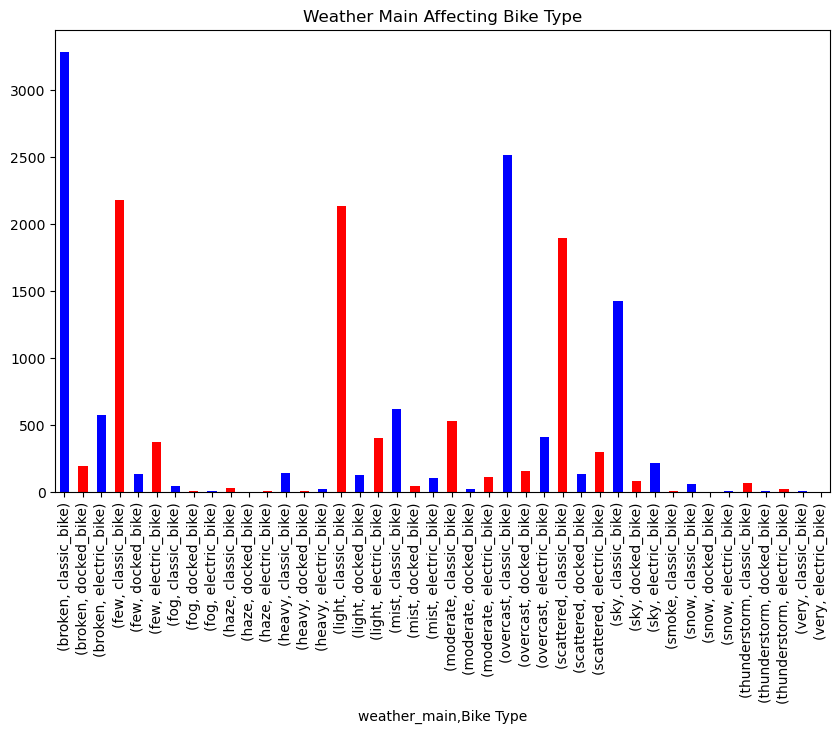

In [6]:
import pandas as pd

# Read the data
df = pd.read_csv('combined_data.csv')

# Create a new column for weather main
df['weather_main'] = df['weather_description'].str.extract('(?P<weather_main>\w+)', expand=True)

# Drop the weather_description column
df = df.drop('weather_description', axis=1)

# Group the data by weather main and bike type
grouped = df.groupby(['weather_main', 'Bike Type'])

# Calculate the number of rides for each group
counts = grouped['Ride ID'].count()

## saving the plot png 
plt.savefig('2022 Bike Type vs Weather')

# Plot the results
counts.plot(kind='bar', figsize=(10, 6), title='Weather Main Affecting Bike Type', color=['blue', 'red'])



C:\Users\georg\AppData\Local\Temp\ipykernel_5804\2128047146.py:5: DtypeWarning: Columns (10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('combined_data.csv')


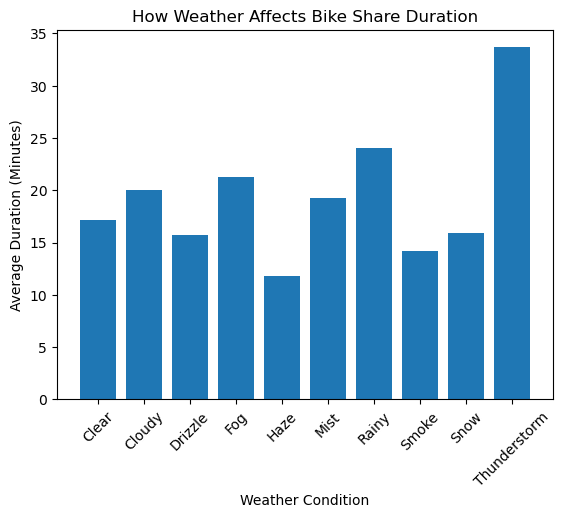

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined data
combined_data = pd.read_csv('combined_data.csv')

# Create a new column for the weather condition
combined_data['weather'] = combined_data['weather_main'].replace({
    'Rain': 'Rainy',
    'Clouds': 'Cloudy',
    'Sunny': 'Sunny'
})

# Group the data by weather condition and duration
grouped = combined_data.groupby('weather', as_index=False).agg({'Duration': 'mean'})

# Create a bar chart
plt.bar(grouped['weather'], grouped['Duration'])
plt.xlabel('Weather Condition')
plt.ylabel('Average Duration (Minutes)')
plt.title('How Weather Affects Bike Share Duration')
plt.xticks(rotation=45)

# saving a png photo of the chart 
plt.savefig('weather vs bike share duration ')

# showing the chart
plt.show()


C:\Users\georg\AppData\Local\Temp\ipykernel_5804\3234208463.py:2: DtypeWarning: Columns (10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data.csv')


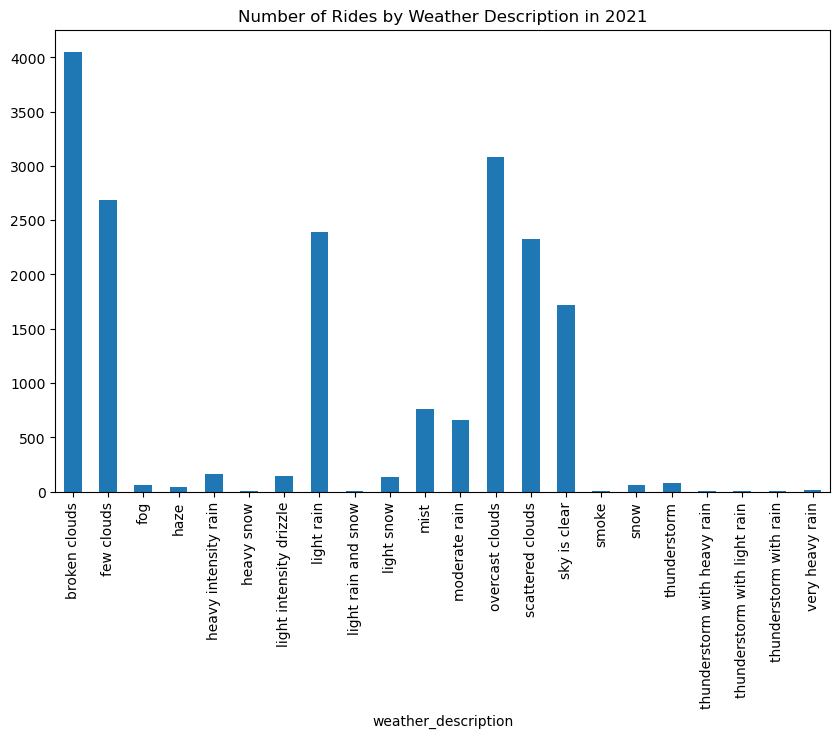

In [8]:
 # Create a chart showing in more foucsing on the weather conditions how it affect the number of rides 
    
# Analysi of how weather affect the number of rides in 2021
df = pd.read_csv('combined_data.csv')

# Convert the dates in the Date column to the format that Pandas expects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter the data to only include rides from 2021
df = df[df['Year'] == 2021]

# Group the data by weather_description
grouped = df.groupby(['weather_description'])

# Calculate the number of rides for each group
counts = grouped['Ride ID'].count()

# Plot the results
counts.plot(kind='bar', figsize=(10, 6), title='Number of Rides by Weather Description in 2021', label='Number of Rides')
# save the chart png 
plt.savefig('2021 Riders  vs weather')

C:\Users\georg\AppData\Local\Temp\ipykernel_5804\2835176832.py:4: DtypeWarning: Columns (10,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data.csv')


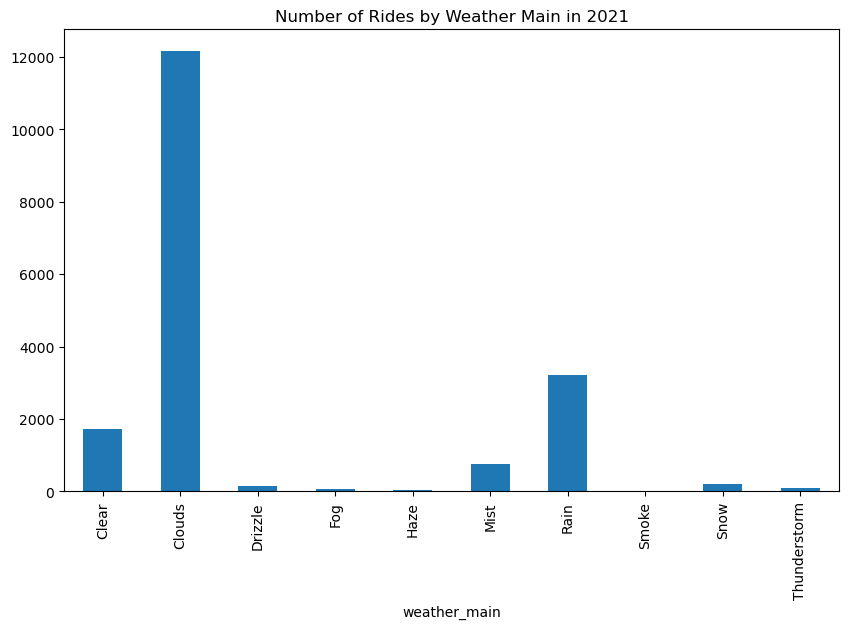

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create chart for the numbers of rides in 2021 and how its impacted by the weather 
df = pd.read_csv('combined_data.csv')

# Convert the dates in the Date column to the format that Pandas expects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Filter the data to only include rides from 2021
df = df[df['Year'] == 2021]

# Group the data by weather_main
grouped = df.groupby(['weather_main'])

# Calculate the number of rides for each group
counts = grouped['Ride ID'].count()

# Plot the results
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax, figsize=(10, 6), title='Number of Rides by Weather Main in 2021', label='Number of Rides')

plt.savefig('2021 Riders  Vs Weather ')
plt.show()

